# Plot clustermaps of Sourmash output for GH7 100 sequences for different kmer sizes
### Using distance matrixes created by sourmash

## Imports

In [1]:
from sourmash import fig
import seaborn as sns
import pandas as pd

## Function to create clustermap

Help on function plotsourmash in module __main__:

plotsourmash(nseqs, kmer)
    Function takes the output distance matrix of Jacarrd indexes calculated by sourmash and plots them as 
    a cluster map for a specified number of sequences (nsqs) and kmer size (kmer).



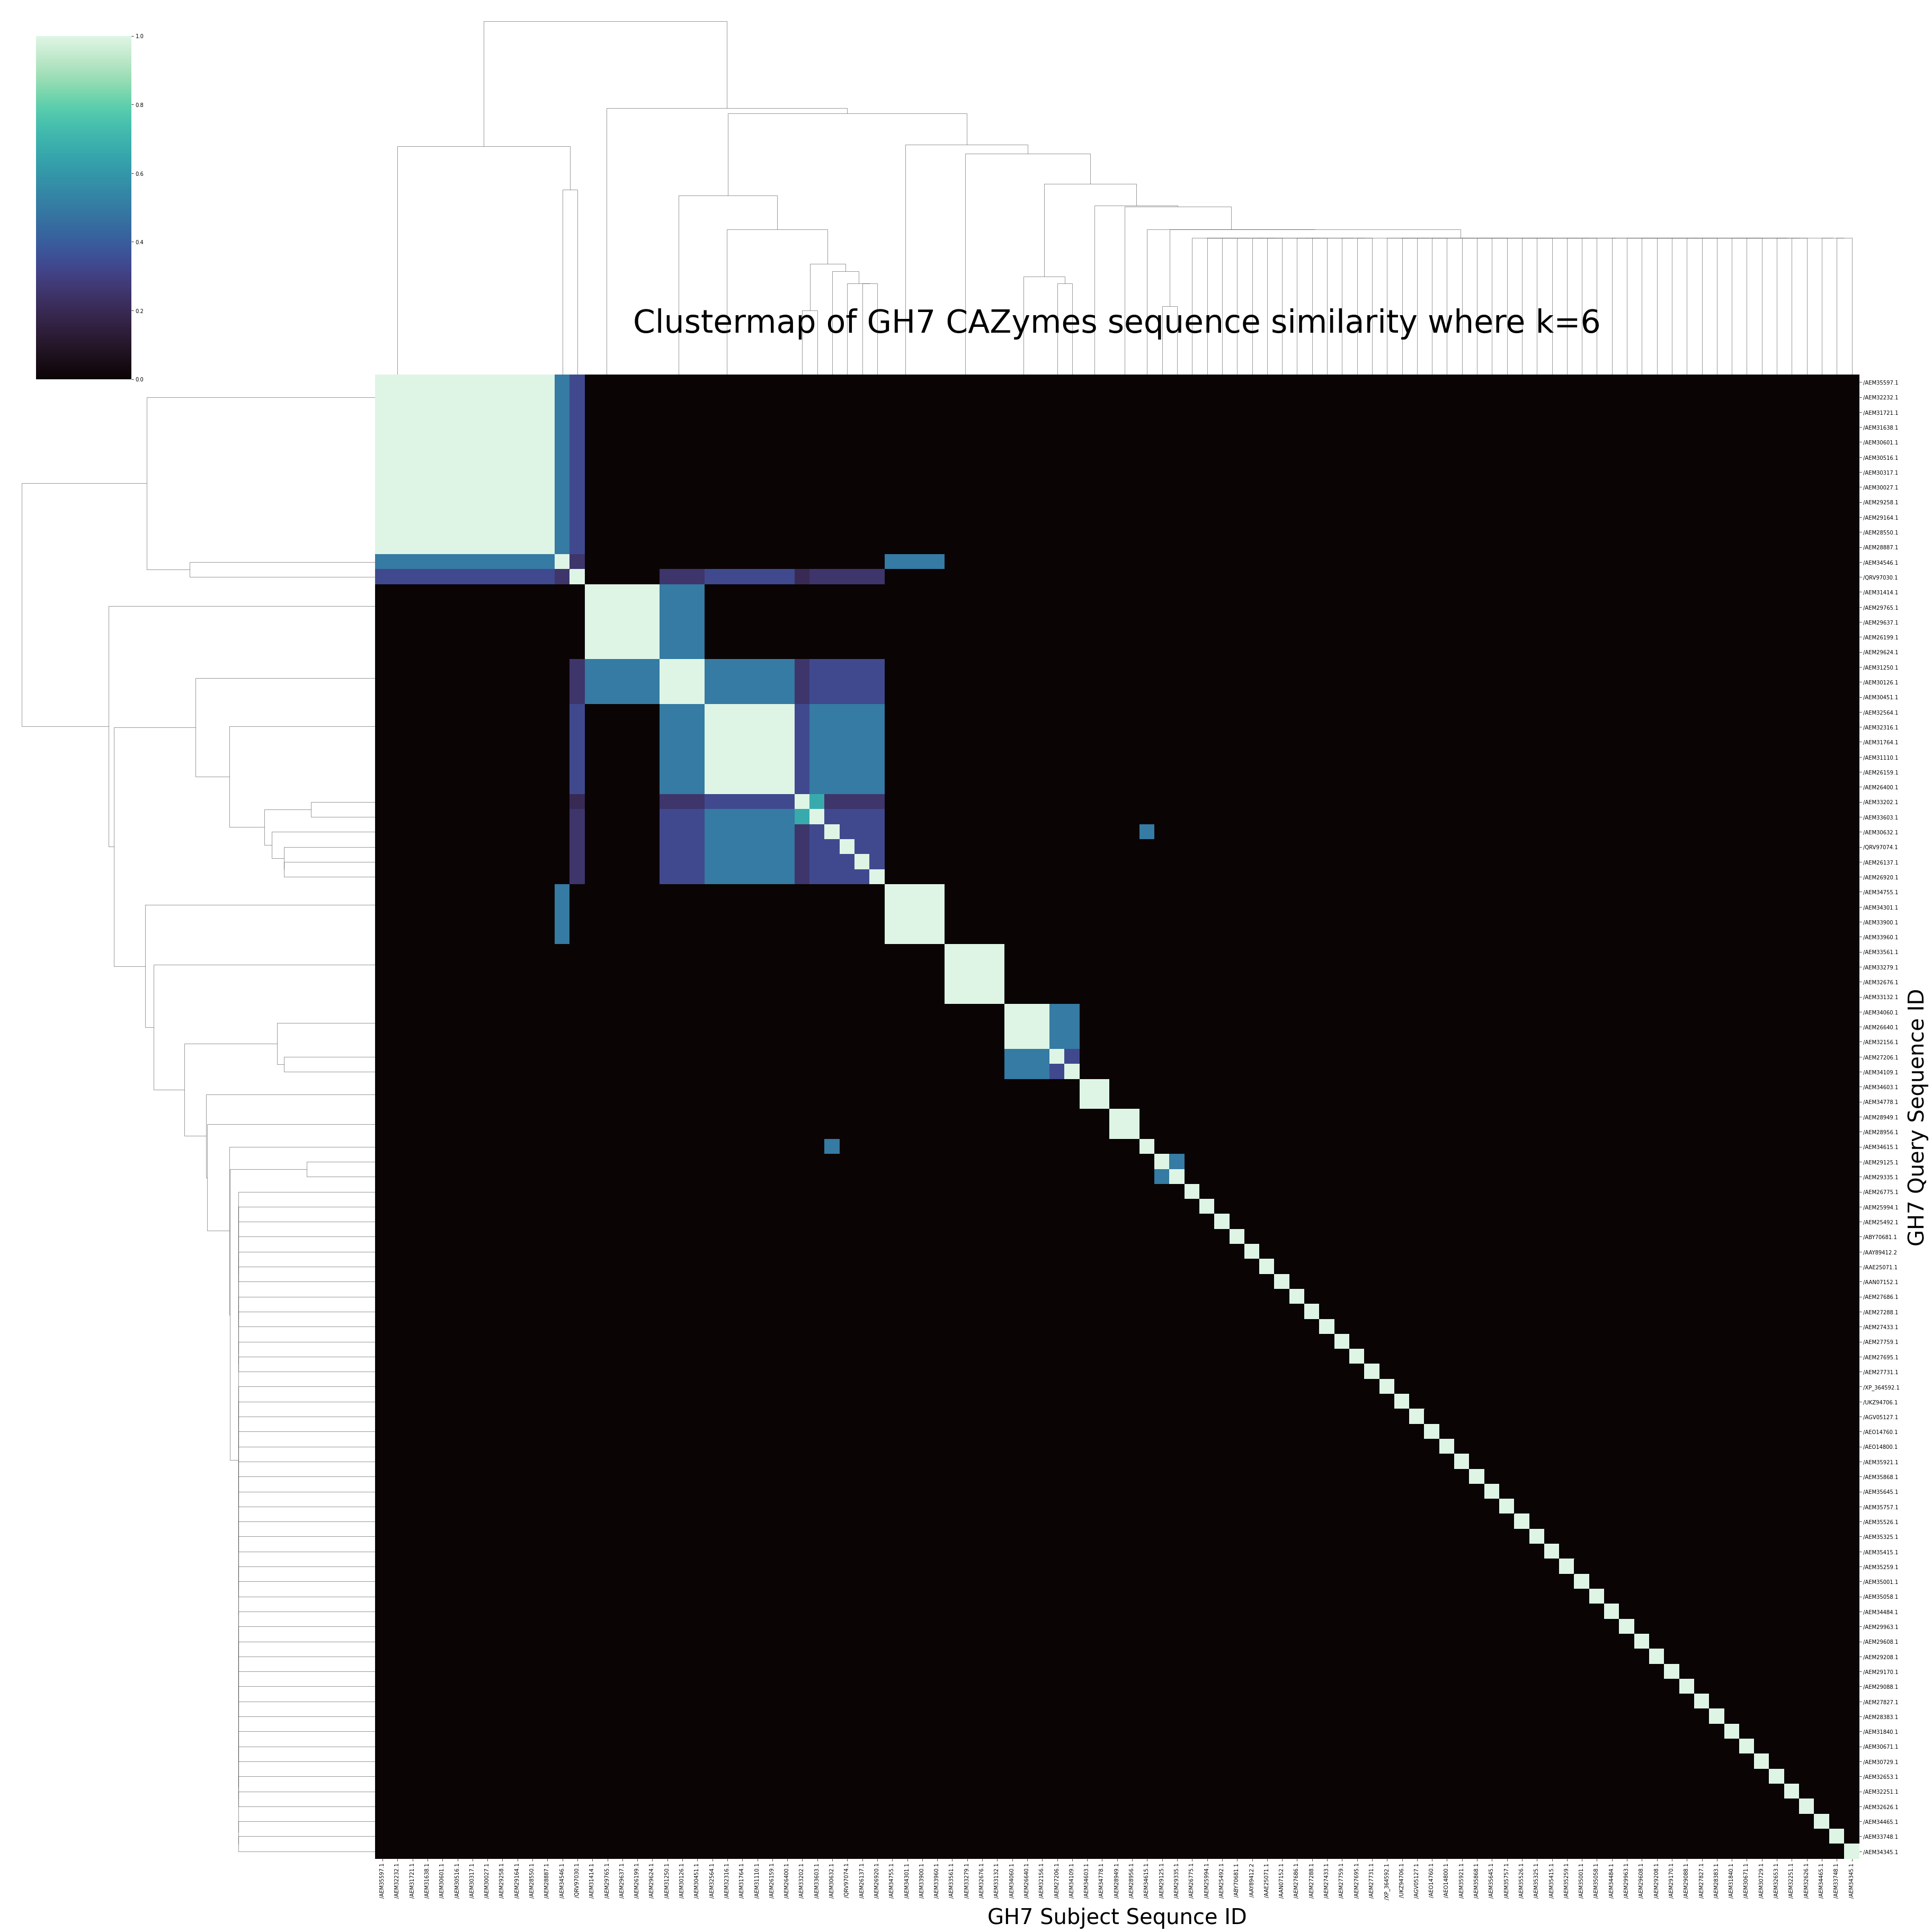

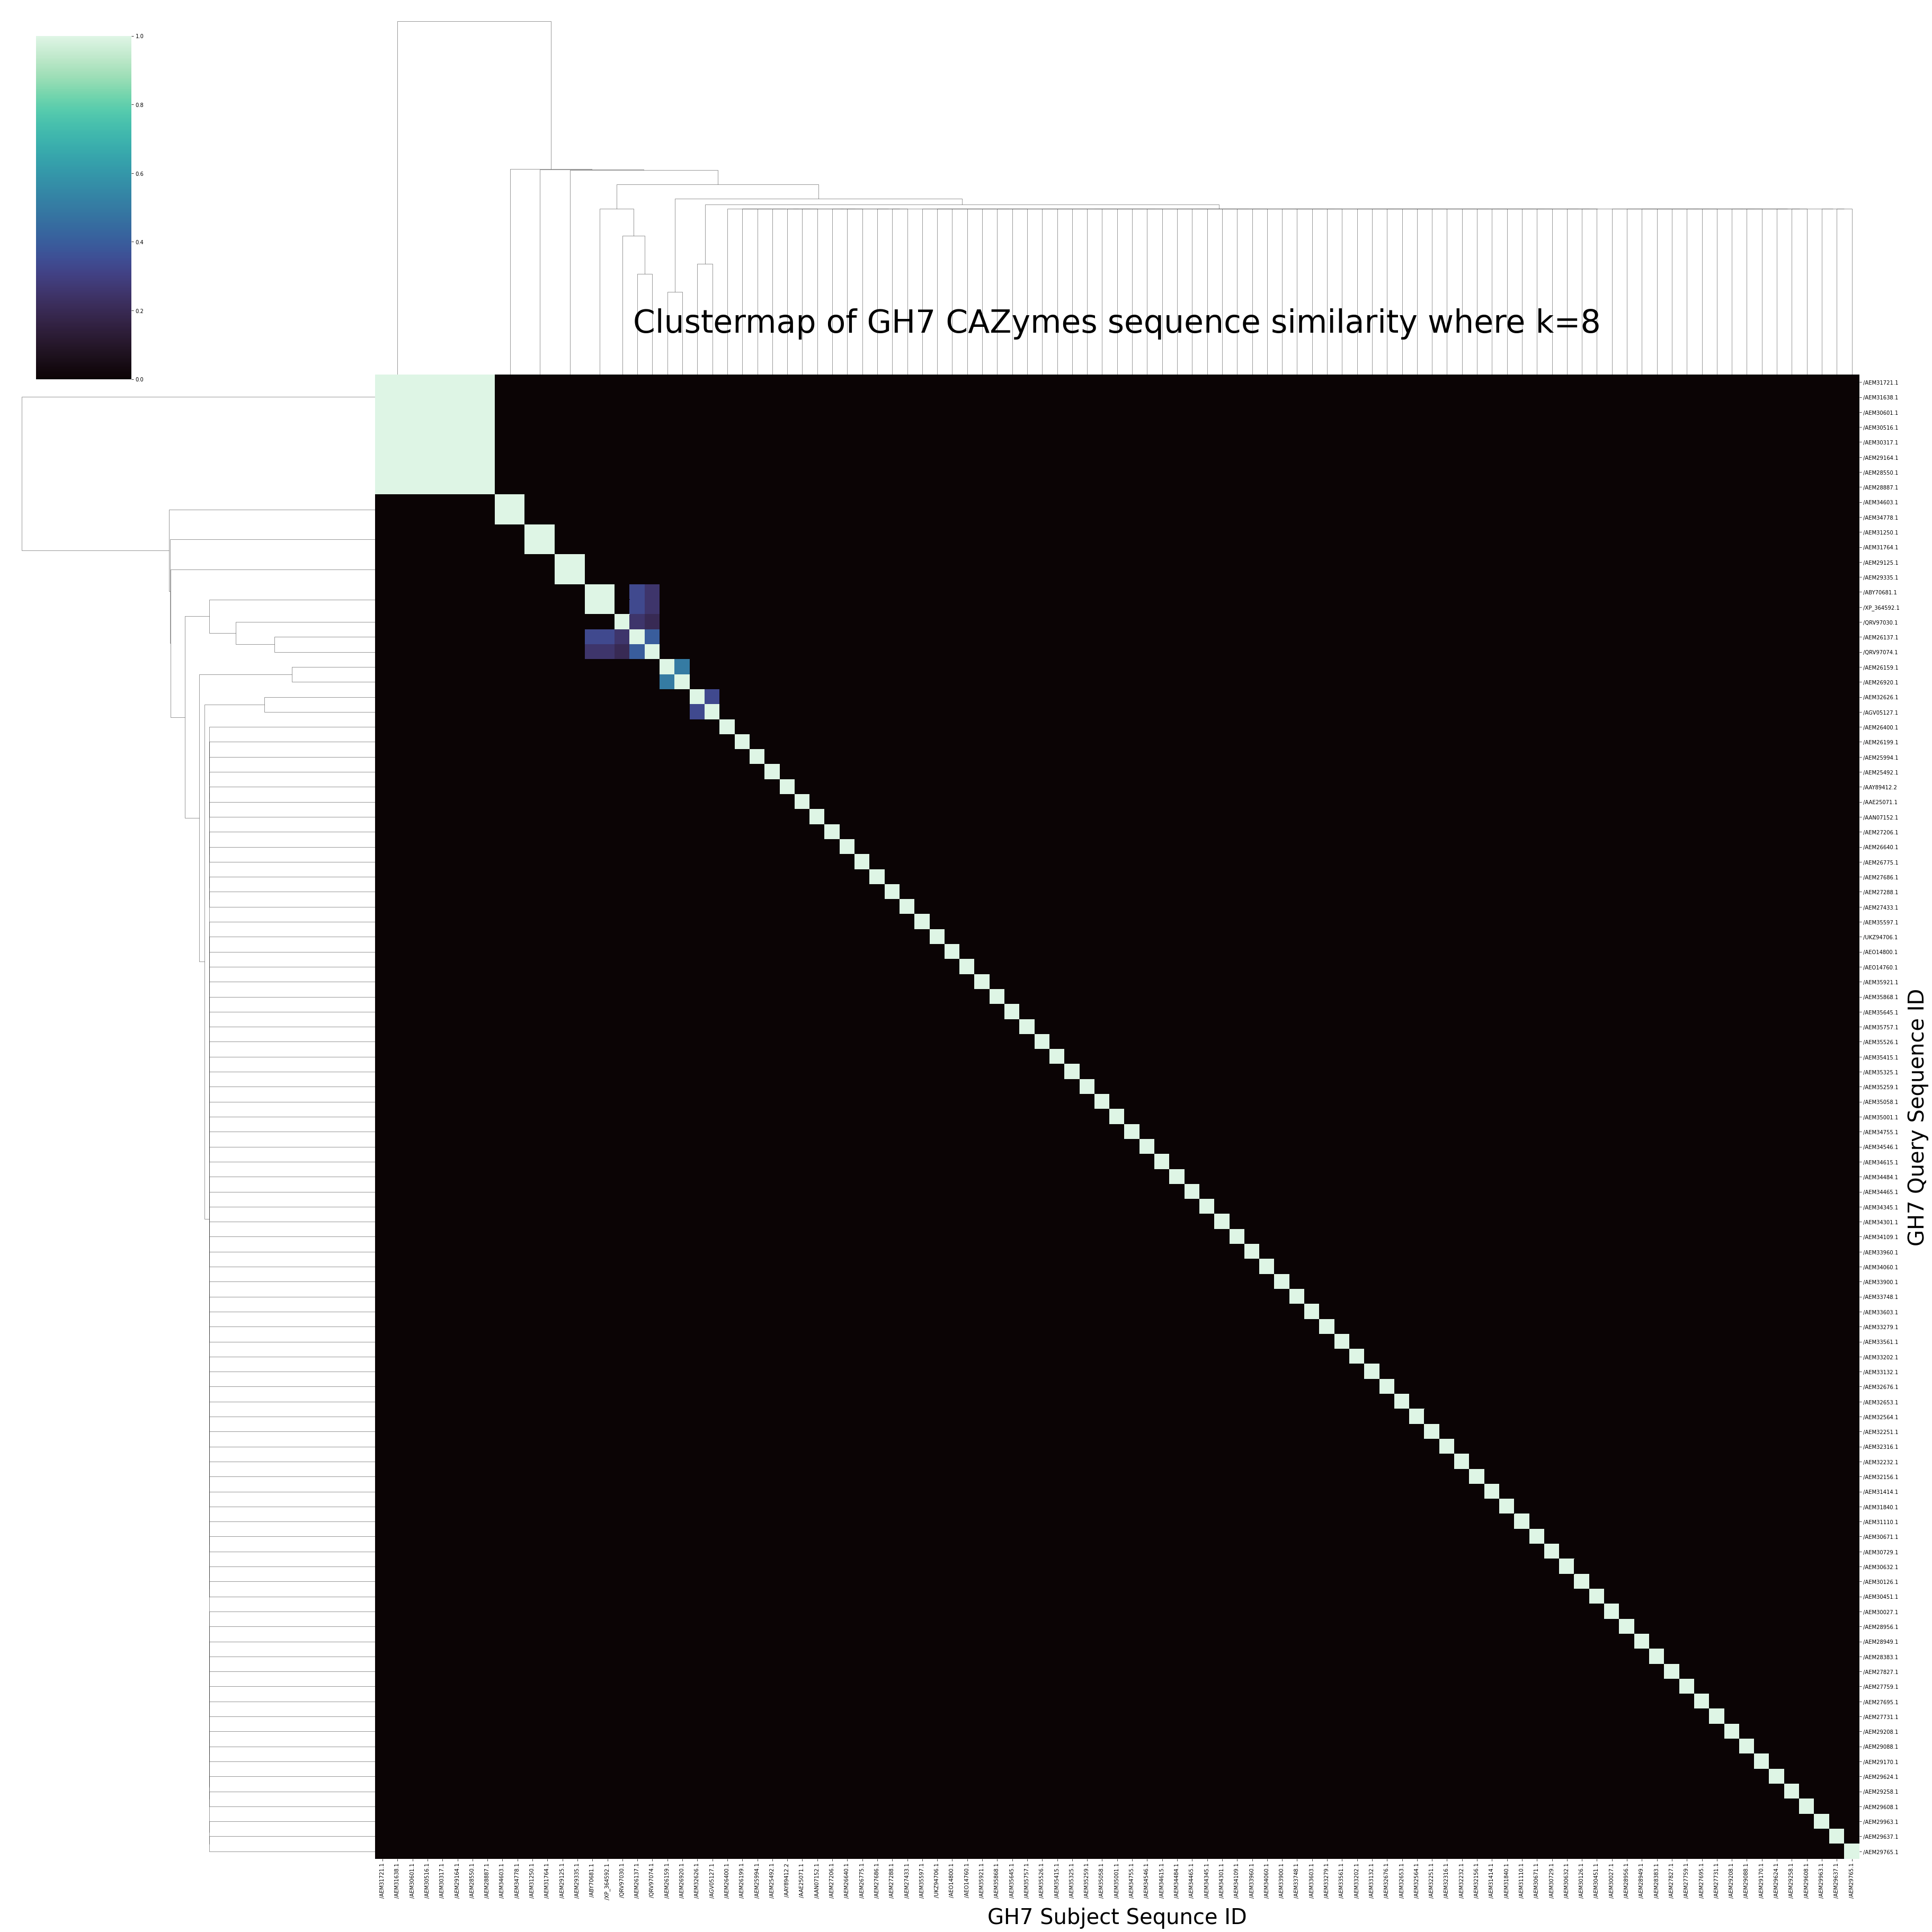

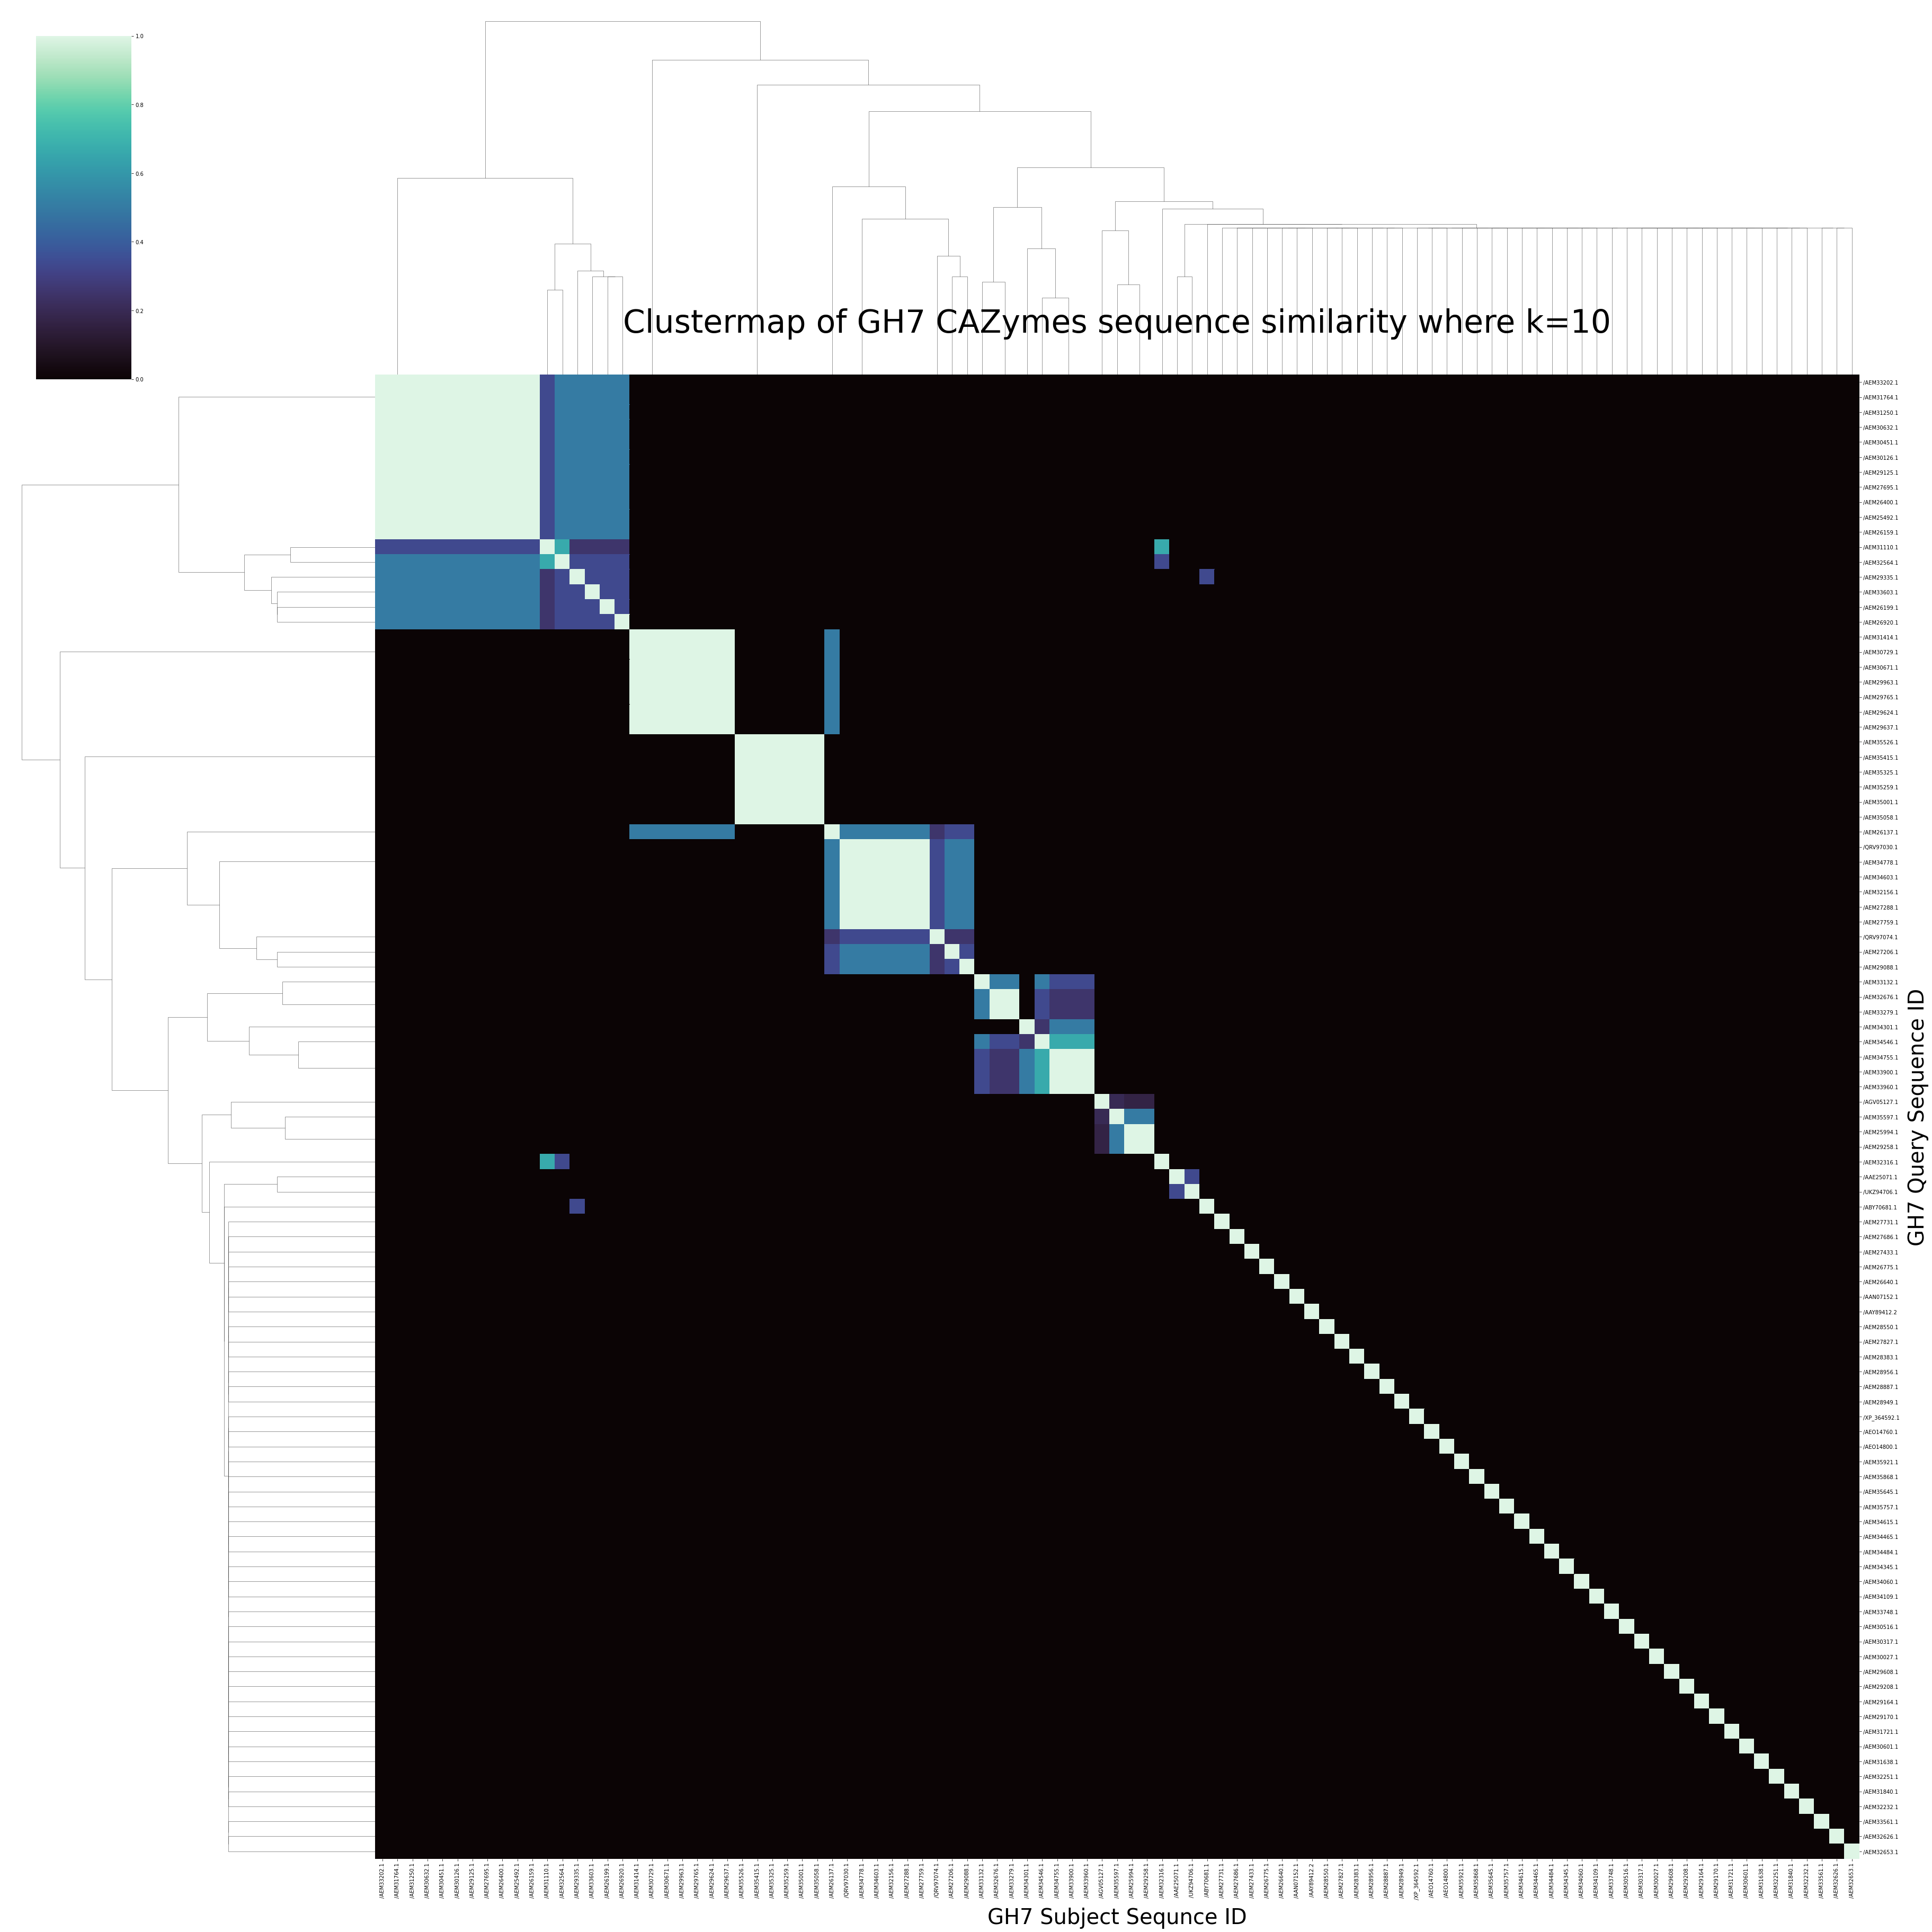

In [2]:
def plotsourmash(nseqs, kmer): # Function is called plotsourmash.
    """Function takes the output distance matrix of Jacarrd indexes calculated by sourmash and plots them as 
    a cluster map for a specified number of sequences (nsqs) and kmer size (kmer). """
    matrix, labels = fig.load_matrix_and_labels(f'../Results/Sourmash_out/{nseqs}out/all{nseqs}k{kmer}.dist') 
    # Load matrix with spesified number of sequences and kmer size.
    newlabels=[] # Create empty list called newlables.
    for label in labels: # Cycle through the filenames/lables to: 
        label = label.replace('.fasta', '') # Remove .fasta
        newlabel = label.replace(f'Data/Sourmash/sourmash_{nseqs}', '') # Remove file path
        newlabels.append(newlabel) # Add the new lable of only the sequence name to the new lables list.

    df = pd.DataFrame(matrix, columns=newlabels, index=newlabels) 
    # Create dataframe with the Jaccard index values and sequence IDs lables.

    figure=sns.clustermap(df, cmap="mako", vmin=0.0, vmax=1.0, figsize=(50, 50)); 
    # Plot clustermap of the data frame created.
    figure.ax_heatmap.set_xlabel("GH7 Subject Sequnce ID",fontsize=40, labelpad=15)
    figure.ax_heatmap.set_ylabel("GH7 Query Sequence ID",fontsize=40, labelpad=15)
    figure.ax_heatmap.set_title(
        f'Clustermap of GH7 CAZymes sequence similarity where k={kmer}',
        fontsize=60, 
        pad=80
    )
    figure.savefig(f'../Results/Sourmash_out/allk{kmer}.dist.png') # Save in results folder.
    
plot = plotsourmash(100, 6) # Run function for 100 sequences and kmer = 6,
plot = plotsourmash(100, 8) # kmer = 8
plot = plotsourmash(100, 10) # kmer = 10

help(plotsourmash) # Call functions doc string to explain what the function does.